# Non-homothetic Preferences and Redistribution 

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve model with "taste for wealth"](#toc2_)    
- 3. [Solve non-homothetic model](#toc3_)    
- 4. [Permanent redistribution](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})
from HANCModel import HANCModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANCModelClass(name='baseline') # create an instance of the model

In [3]:
model.ss.w = 1 - model.par.alpha 
model.ss.r = 0.04 
model.par.beta = 0.956
model.par.phi_a = 0.0

model.solve_hh_ss(do_print=False)
model.simulate_hh_ss(do_print=False)

Plot consumption policy function across permanent income types

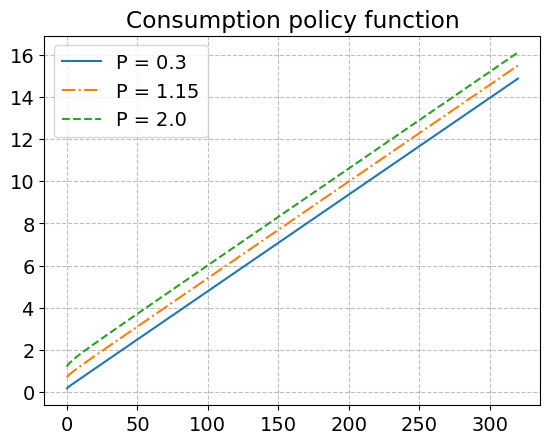

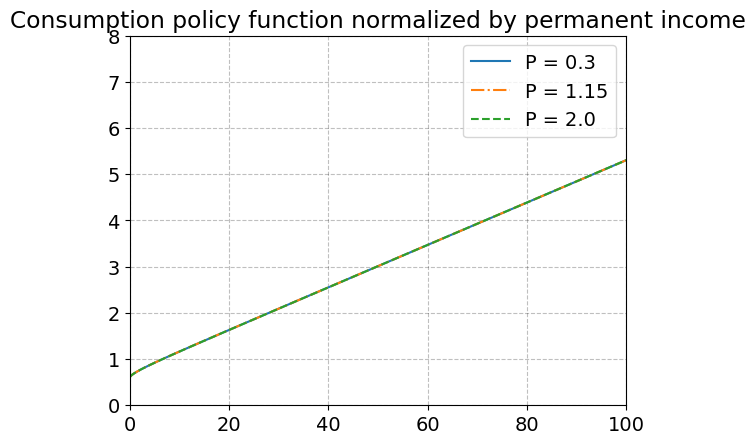

In [4]:
def plot_c(model):
    par = model.par
    ss = model.ss

    c = np.sum(par.z_ergodic[None,:,None]*ss.c,axis=1)
    a = np.sum(par.z_ergodic[None,:,None]*ss.a,axis=1)

    lstyles = ['-', '-.', '--']
    for p in range(par.NP):
        plt.plot(par.a_grid,c[p], label=f'P = {par.P_grid[p]}', linestyle=lstyles[p])
    plt.legend()
    plt.title('Consumption policy function')
    plt.show()

    # normalize by permanent income
    for p in range(par.NP):
        plt.plot(par.a_grid/par.P_grid[p],c[p]/par.P_grid[p], label=f'P = {par.P_grid[p]}', linestyle=lstyles[p])
    plt.xlim([0.,100])
    plt.ylim([0.,8])
    plt.title('Consumption policy function normalized by permanent income')
    plt.legend()
    plt.show()


plot_c(model)

## 2. <a id='toc2_'></a>[Solve model with "taste for wealth"](#toc0_)

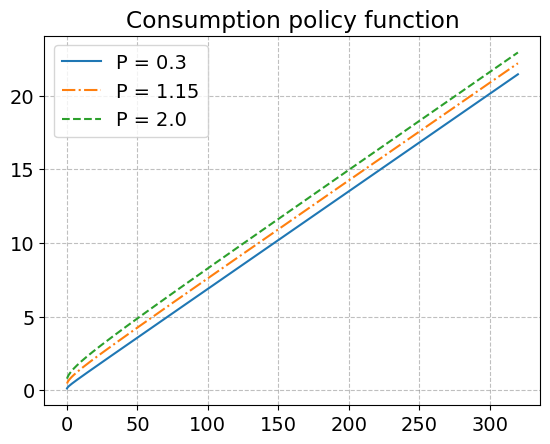

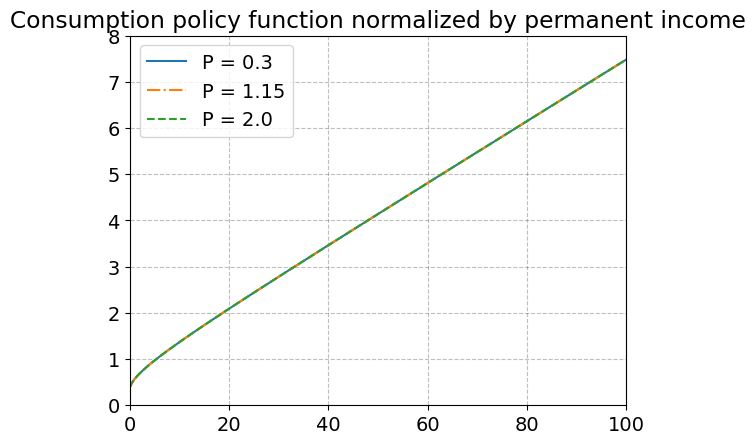

In [5]:
model_TFW = model.copy()
model_TFW.name = 'TFW-H'

model_TFW.par.beta = 0.93
model_TFW.par.phi_a = 0.1

model_TFW.solve_hh_ss(do_print=False)
model_TFW.simulate_hh_ss(do_print=False)

plot_c(model_TFW)

## 3. <a id='toc3_'></a>[Solve non-homothetic model](#toc0_)

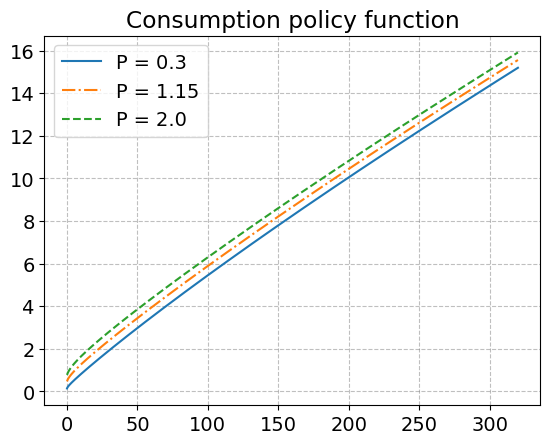

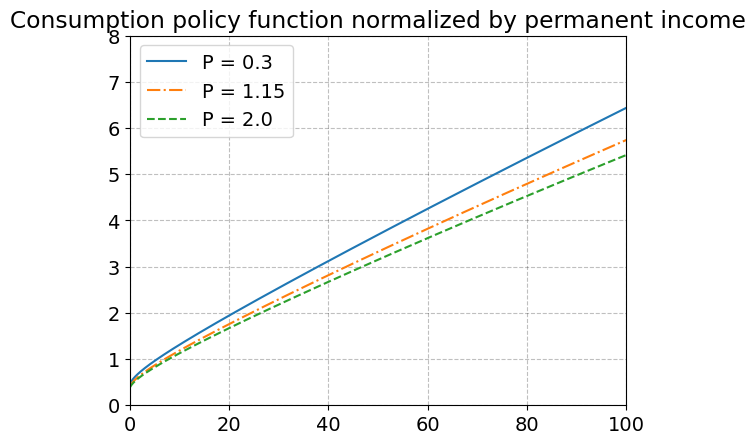

In [6]:
model_NH = model.copy()
model_NH.name = 'TFW-NH'

model_NH.par.beta = 0.93
model_NH.par.phi_a = 0.1
model_NH.par.sigma_a = 0.7

model_NH.solve_hh_ss(do_print=False)
model_NH.simulate_hh_ss(do_print=False)

plot_c(model_NH)

## 4. <a id='toc4_'></a>[Permanent redistribution](#toc0_)

What are the effect - in partial equilibrium - of a permanent redistribution from the poorest permanent income households to the richest?


In particular transfer 0.1 ressources from the poorest tertile to the richest tertile (leaving the middle tertile unaltered).

Implement the transfer by changing *par.P_grid*. 

In [8]:
Delta = 0.1 
results = {'TFW-H' : {}, 'TFW-NH' : {}}

for model_ in [model_TFW, model_NH]:
    model_copy = model_.copy()
    model_copy.par.P_min -= Delta 
    model_copy.par.P_max += Delta

    model_copy.solve_hh_ss(do_print=False)
    model_copy.simulate_hh_ss(do_print=False)

    results[model_.name]['A'] = (model_copy.ss.A_hh / model_.ss.A_hh -1)*100
    results[model_.name]['C'] = (model_copy.ss.C_hh / model_.ss.C_hh -1)*100

dA_TFW_H = results['TFW-H']['A']
dA_TFW_NH = results['TFW-NH']['A']
dC_TFW_H = results['TFW-H']['C']
dC_TFW_NH = results['TFW-NH']['C']

print(f'Change in aggregate wealth in homothetic model: {dA_TFW_H:.3f}%')
print(f'Change in aggregate wealth in non-homothetic model: {dA_TFW_NH:.3f}%')

print(f'Change in aggregate consumption in homothetic model: {dC_TFW_H:.3f}%')
print(f'Change in aggregate consumption in non-homothetic model: {dC_TFW_NH:.3f}%')

Change in aggregate wealth in homothetic model: 0.000%
Change in aggregate wealth in non-homothetic model: 3.967%
Change in aggregate consumption in homothetic model: 0.000%
Change in aggregate consumption in non-homothetic model: 0.961%
